# Loan Prediction

Solution for https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

TODO Feature engineering

Step 1. Load sets: test data and train data
switch to panda: http://akuederle.com/stop-using-numpy-loadtxt

In [1]:
#VARIABLE DESCRIPTIONS:
#Variable	          Description
#Loan_ID	                  Unique Loan ID
#Gender	                  Male/ Female
#Married	                  Applicant married (Y/N)
#Dependents	          Number of dependents
#Education	          Applicant Education (Graduate/ Under Graduate)
#Self_Employed	          Self employed (Y/N)
#ApplicantIncome	          Applicant income
#CoapplicantIncome	  Coapplicant income
#LoanAmount	          Loan amount in thousands
#Loan_Amount_Term	  Term of loan in months
#Credit_History	          credit history meets guidelines
#Property_Area	          Urban/ Semi Urban/ Rural
#Loan_Status	          Loan approved (Y/N)
import pandas as pd

# training data set
df_train = pd.read_csv(filepath_or_buffer='data/train_file.csv', index_col=0)
# assignment set
df_solution = pd.read_csv(filepath_or_buffer='data/test_file.csv', index_col=0)

# print structure of data
print('shape train: ' + str(df_train.shape))
print('shape solution: ' + str(df_solution.shape))
df_train.head(10)
df_train.describe()

shape train: (614, 12)
shape solution: (367, 11)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [2]:
# Check missing data. Any column above 20% will be dropped. Which is none
df_train.isnull().sum()/len(df_train)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [3]:
df_train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [4]:
df_train['LoanAmount'].hist(bins=50)

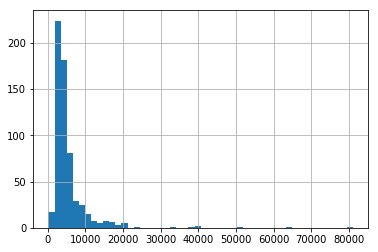

In [5]:
df_train['ApplicantIncome'].hist(bins=50)

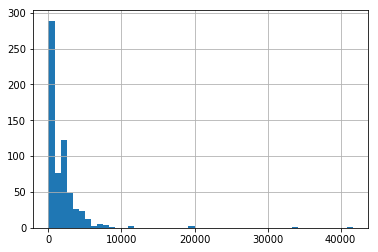

In [6]:
df_train['CoapplicantIncome'].hist(bins=50)

Education         
Graduate      0.10     2362.70
              0.25     2998.75
              0.50     4000.00
              1.00    81000.00
Not Graduate  0.10     1995.10
              0.25     2583.00
              0.50     3357.50
              1.00    18165.00
Name: ApplicantIncome, dtype: float64

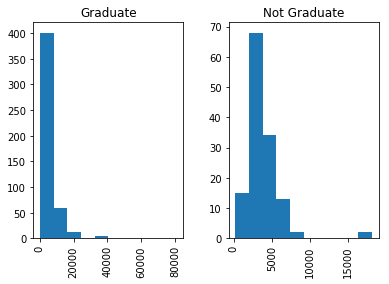

In [7]:
df_train.hist(column='ApplicantIncome', by = 'Education')
df_train.groupby(['Education'])['ApplicantIncome'].quantile([.1, .25, .5, 1])

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

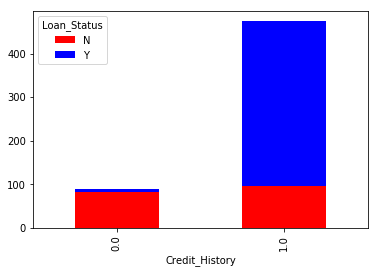

In [8]:
#import math
#def creditHistoryAsInt(x):
#    if math.isnan(x):
#        return 2
#    elif float(x)<0.5:
#        return 0
#    else:
#        return 1   
#temp2 = df_train['Credit_History'].apply(creditHistoryAsInt)
#print(temp2)
temp = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
temp.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
df_train.groupby(['Credit_History'])['Loan_Status'].value_counts(normalize=True)

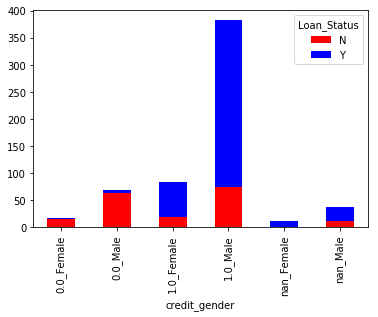

In [9]:
#Credit History & Gender
df_train['credit_gender'] = pd.Categorical(df_train['Credit_History'].astype(str)+"_"+ df_train['Gender'])
temp1 = pd.crosstab(df_train['credit_gender'], df_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [10]:
# Use credit history as solution (not defined is treated as yes)
import math
df_test = pd.read_csv(filepath_or_buffer='data/test_file.csv', index_col=0)

def creditHistoryAsSolution(x):
    if math.isnan(x):
        return 'Y'
    elif float(x)<0.5:
        return 'N'
    else:
        return 'Y'
    
solution_df = pd.DataFrame(({'Loan_ID':df_test.index,
                             'Loan_Status':df_test['Credit_History'].apply(creditHistoryAsSolution)}))
    
solution_df.to_csv(path_or_buf='solution_credit_history.csv', index=False)
# gives a score of 0.777777777777778

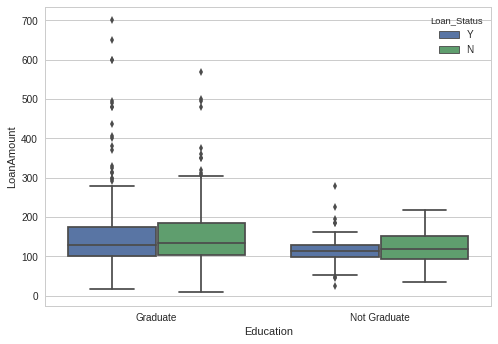

In [11]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="Education", y="LoanAmount", hue="Loan_Status", data=df_train)

In [12]:
df_train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize=True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: Loan_Status, dtype: float64

In [13]:
# Encode labels to integers
# from sklearn.preprocessing import LabelEncoder
# var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area',
#           'Credit_History','totalincome', 'pay_back', 'Loan_Amount_Term', 'LoanAmount', 'Loan_Status']
# labelEncoder = LabelEncoder()
# for i in var_mod:
#    print(str(i))
#    df_train[i] = labelEncoder.fit_transform(df_train[i])
# df_train.dtypes

In [14]:
# Efter data convert
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set(color_codes=True)
# 
# def correlationPlot(X, yAxis):
#    sns.regplot(y=yAxis, x="Loan_Status", data=X);
#     
# correlationPlot(df_train, 'LoanAmount')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

def convertNaNtoZero(x):
    if math.isnan(x):
        return 0
    else:
        return x
    
def convetLoan_Amount_Term(x):
    if math.isnan(x):
        return 480
    else:
        return x

def creditHistoryAsInt(x):
    if math.isnan(x):
        return 2
    elif float(x)<0.5:
        return 0
    else:
        return 1

def convertDataFrameDataCleaning(x):
    # Impute missing categorical data with most frequent
    x['Gender'] = x['Gender'].fillna(x['Gender'].value_counts().index[0])
    x['Married'] = x['Married'].fillna(x['Married'].value_counts().index[0])
    x['Dependents'] = x['Dependents'].fillna(x['Dependents'].value_counts().index[0])
    x['Self_Employed'] = x['Self_Employed'].fillna(x['Self_Employed'].value_counts().index[0])
    
    # Impute missing categorical data with code for missing data
    #x['Gender'] = x['Gender'].fillna(3)
    #x['Married'] = x['Married'].fillna(3)
    #x['Dependents'] = x['Dependents'].fillna(3)
    #x['Self_Employed'] = x['Self_Employed'].fillna(3)
    
    # Impute numerical data with median
    x['Loan_Amount_Term'] = x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].median())
    x['LoanAmount'] = x['LoanAmount'].fillna(x['LoanAmount'].median())
    x['loanamt_log'] = np.log(x['LoanAmount'])
    # x['LoanAmount'] = x['LoanAmount'].fillna(0)
    
    return x
    
    
def convertDataFrame(x):
    x['Gender'] = x['Gender'].astype('category')
    x['Married'] = x['Married'].astype('category')
    x['Dependents'] = x['Dependents'].astype('category')
    x['Education'] = x['Education'].astype('category')
    x['Self_Employed'] = x['Self_Employed'].astype('category')
    x['Property_Area'] = x['Property_Area'].astype('category')
    cat_columns = x.select_dtypes(['category']).columns
    x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)
    
    x['Credit_History'] = x['Credit_History'].apply(creditHistoryAsInt)
    # convert NaN to 1  x['Credit_History'] = x['Credit_History'].fillna(x['Credit_History'].value_counts().index[0])
    
    x['LoanAmount'] = x['LoanAmount'].apply(convertNaNtoZero)
    x['Loan_Amount_Term'] = x['Loan_Amount_Term'].apply(convertNaNtoZero)
    
    x['LoanAmount'] = x['LoanAmount'] * 1000
    
    # new features
    x['totalincome'] = x['ApplicantIncome'] + x['CoapplicantIncome']
    x['pay_back'] = x['LoanAmount'] / x['totalincome']
    
    # logaritm
    x['totalincome_log'] = np.log(x.totalincome)
    return x

def convertLoanStatus(x):
    x['Loan_Status'] = x['Loan_Status'].astype('category')
    cat_columns = x.select_dtypes(['category']).columns
    x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)
    return x


df_train = convertDataFrameDataCleaning(df_train)
df_train = convertDataFrame(df_train)
df_train = convertLoanStatus(df_train)
df_solution = convertDataFrameDataCleaning(df_solution)
df_solution = convertDataFrame(df_solution)

print('shape solution: ' + str(df_solution.shape))

# Check variance
df_train.var()

shape solution: (367, 15)


Gender               1.493802e-01
Married              2.269317e-01
Dependents           1.019339e+00
Education            1.708902e-01
Self_Employed        1.159035e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+09
Loan_Amount_Term     4.151048e+03
Credit_History       2.227126e-01
Property_Area        6.201280e-01
Loan_Status          2.152707e-01
credit_gender        1.291592e+00
loanamt_log          2.460118e-01
totalincome          4.171434e+07
pay_back             7.581465e+01
totalincome_log      2.971357e-01
dtype: float64

In [16]:
# Check correlation
df_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,credit_gender,loanamt_log,totalincome,pay_back,totalincome_log
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,-0.009963,-0.025752,0.017987,0.299290,0.143388,0.093191,-0.104615,0.167285
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.032441,0.004257,0.091478,0.136910,0.179802,0.083319,-0.013898,0.151527
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.044415,-0.000244,0.010118,0.004469,0.156737,0.125590,0.056043,0.112812
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.037534,-0.065243,-0.085884,0.013686,-0.145885,-0.161362,0.075202,-0.204861
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,0.002117,-0.030860,-0.003700,-0.047285,0.109677,0.113000,-0.072657,0.176709
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.033996,-0.009500,-0.004710,-0.070146,0.435392,0.893037,-0.317468,0.717829
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.068806,0.010522,-0.059187,0.088007,0.206330,0.342781,-0.201101,0.383827
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,0.029688,-0.046632,-0.033214,0.002851,0.895708,0.620316,0.152830,0.687825
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.009121,-0.076120,-0.022549,-0.030173,0.085353,-0.070917,0.166304,-0.056044
Credit_History,-0.009963,0.032441,-0.044415,-0.037534,0.002117,-0.033996,0.068806,0.029688,-0.009121,1.000000,0.019582,0.423212,0.817838,0.013020,-0.000982,-0.010980,0.023942


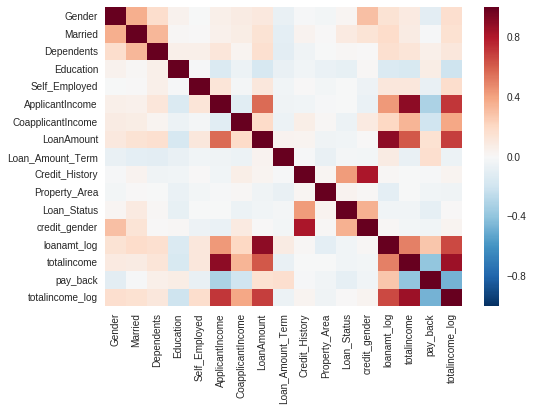

In [17]:
import seaborn as sns
sns.heatmap(df_train.corr())

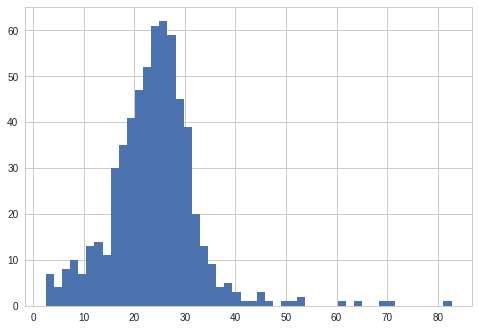

In [18]:
df_train['pay_back'].hist(bins=50)

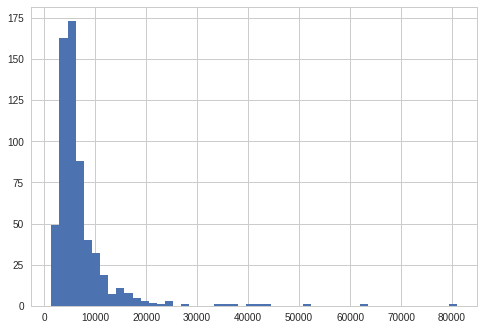

In [19]:
df_train['totalincome'].hist(bins=50)

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

#tips = df_train
#sns.regplot(y="Credit_History", x="Loan_Status", data=tips);
# df_train.head()

In [21]:
col_features = [
    'Credit_History',
    'pay_back',
    'Education',
    'Married',
    'Dependents',
    'Gender',
    'Self_Employed',
    'totalincome',
    'totalincome_log',
    'LoanAmount',
    'loanamt_log',
    'Loan_Amount_Term',
    'Property_Area'
]
X_train_features = df_train[col_features]
X_assignment_features = df_solution[col_features]
y_train_target = df_train['Loan_Status']
print(X_train_features[:10])


          Credit_History   pay_back  Education  Married  Dependents  Gender  \
Loan_ID                                                                       
LP001002               1  21.884083          0        0           0       1   
LP001003               1  21.014612          0        1           1       1   
LP001005               1  22.000000          0        1           0       1   
LP001006               1  24.286582          1        1           0       1   
LP001008               1  23.500000          0        0           0       1   
LP001011               1  27.774888          0        1           2       1   
LP001013               1  24.681736          1        1           0       1   
LP001014               0  28.519856          0        1           3       1   
LP001018               1  30.368764          0        1           2       1   
LP001020               1  14.658322          0        1           1       1   

          Self_Employed  totalincome  totalincome_l

In [22]:
print(y_train_target[:10])

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
LP001011    1
LP001013    1
LP001014    0
LP001018    1
LP001020    0
Name: Loan_Status, dtype: int8


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def floatToBool(x):
    if float(x)<0.5:
        return 'N'
    else:
        return 'Y'

def trainAndPredictAndSave(X, y, estimator, name, X_assignement):
    estimator.fit(X, y)
    yPred = estimator.predict(X)
    
    # print cross-validation
    crossVal = cross_val_score(estimator, X, y, cv=10, scoring='accuracy').mean()
    print(name + ', crossVal: ' + str(crossVal))
    
    # print accuracy
    accuracy = metrics.accuracy_score(yPred, y)
    print(name + ', accuracy : ' +  str(accuracy))

    # print error
    error = np.sqrt(metrics.mean_squared_error(y, yPred))
    print(name + ', error : ' + str(error))
    
    # save...
    y_assignement = estimator.predict(X_assignement)
    
    # convert numpy array to panda dataframe
    solution_df = pd.DataFrame(({'Loan_ID':X_assignement.index,
                             'Loan_Status':y_assignement}))

    solution_df['Loan_Status'] = solution_df['Loan_Status'].map(floatToBool)
    filename = 'solution_'+name+'.csv'
    print(name + ', Saving: ' + filename)
    solution_df.to_csv(path_or_buf=filename, index=False)



In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# classifier9
classifier_gb1 = GradientBoostingClassifier(random_state=5, loss='deviance', learning_rate=0.0498, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
classifier_gb2 = GradientBoostingClassifier(random_state=5, loss='deviance', learning_rate=0.0499, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
classifier_gb3 = GradientBoostingClassifier(random_state=1, loss='deviance', learning_rate=0.05, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
classifier_gb4 = GradientBoostingClassifier(random_state=5, loss='deviance', learning_rate=0.0501, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
classifier_gb5 = GradientBoostingClassifier(random_state=5, loss='deviance', learning_rate=0.0502, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
#classifier_rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
#classifier_gb15 = GradientBoostingClassifier(loss='deviance', learning_rate=0.15, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
#classifier_gb35 = GradientBoostingClassifier(loss='deviance', learning_rate=0.35, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)

# train, predict and save
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb1, "gb04998", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb2, "gb04999", X_assignment_features)
trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb3, "gb05", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb4, "gb0501", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb5, "gb0502", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_rf, "rf", X_assignment_features)
# trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb15, "gb15", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb35, "gb35", X_assignment_features

gb05, crossVal: 0.786703096539
gb05, accuracy : 0.934853420195
gb05, error : 0.255238280445
gb05, Saving: solution_gb05.csv


In [25]:
#col_features_reduced = [
#    'Credit_History', 
#    'pay_back', 
    #'totalincome',
#    'totalincome_log',
    # 'LoanAmount',
#    'loanamt_log',
#    'Dependents'
#]
col_features_reduced = [
    'Credit_History', 
    'Married', 
    'Education',
    'Gender',
    'Self_Employed',
    'Property_Area'
]
X_train_features = df_train[col_features_reduced]
X_assignment_features = df_solution[col_features_reduced]

classifier_nn20_reduced = KNeighborsClassifier(n_neighbors=20)
classifier_nn7_reduced = KNeighborsClassifier(n_neighbors=7)
classifier_dt_reduced = DecisionTreeClassifier(random_state=1)
classifier_gb05_reduced = GradientBoostingClassifier(random_state=5, loss='deviance', learning_rate=0.05, n_estimators=500, max_features='sqrt', min_samples_split=4, max_depth=3)
classifier_rf_reduced = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)  
classifier_mlp_reduced = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-3, hidden_layer_sizes=(30,30,30), random_state=1)


# train, predict and save
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_nn20_reduced, "nn20_red", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_nn7_reduced, "nn7_red", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_dt_reduced, "dt_red", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_gb05_reduced, "gb05_red", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_rf_reduced, "rf_red", X_assignment_features)
#trainAndPredictAndSave(X_train_features, y_train_target, classifier_mlp_reduced, "mlp_red", X_assignment_features)
